After the experiments with the similarity according to purchases, the best looking one figure is drawn and we review the clusters.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from scipy.sparse import coo_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
def jaccard(x1, x2):
    """
    Given two numpy arrays, returns a similarity between 0 and 1. (Float)
    """
    x1 = x1.astype(np.int8)
    x2 = x2.astype(np.int8)
    intersection = (x1 & x2).sum()
    union = (x1 | x2).sum()
    similarity = intersection/union
    return similarity

In [3]:
purchase_data = pd.read_parquet("../dat/steam_purchase.parquet")

In [4]:
user_encoder = OrdinalEncoder(dtype=np.int64)
game_encoder = OrdinalEncoder(dtype=np.int64)

cleaned_set = purchase_data.set_index("game")[purchase_data.groupby("game").count().userId >= 20].reset_index()
cleaned_set["row"] = user_encoder.fit_transform(np.array(cleaned_set.userId)[:, np.newaxis])
cleaned_set["column"] = game_encoder.fit_transform(np.array(cleaned_set.game)[:, np.newaxis])

rating_matrix = coo_matrix((np.ones(shape=(len(cleaned_set),)), (np.array(cleaned_set.row), np.array(cleaned_set.column))),
           shape=((cleaned_set.row.max() + 1, cleaned_set.column.max() + 1)),
           dtype=np.int8).toarray().T

/tmp/ipykernel_716/3854202433.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_set = purchase_data.set_index("game")[purchase_data.groupby("game").count().userId >= 20].reset_index()


According to paper by Kobak et. al., PCA initialization preservers the global structure better compared to random initialization.

In [76]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=15).fit_transform(rating_matrix)

/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


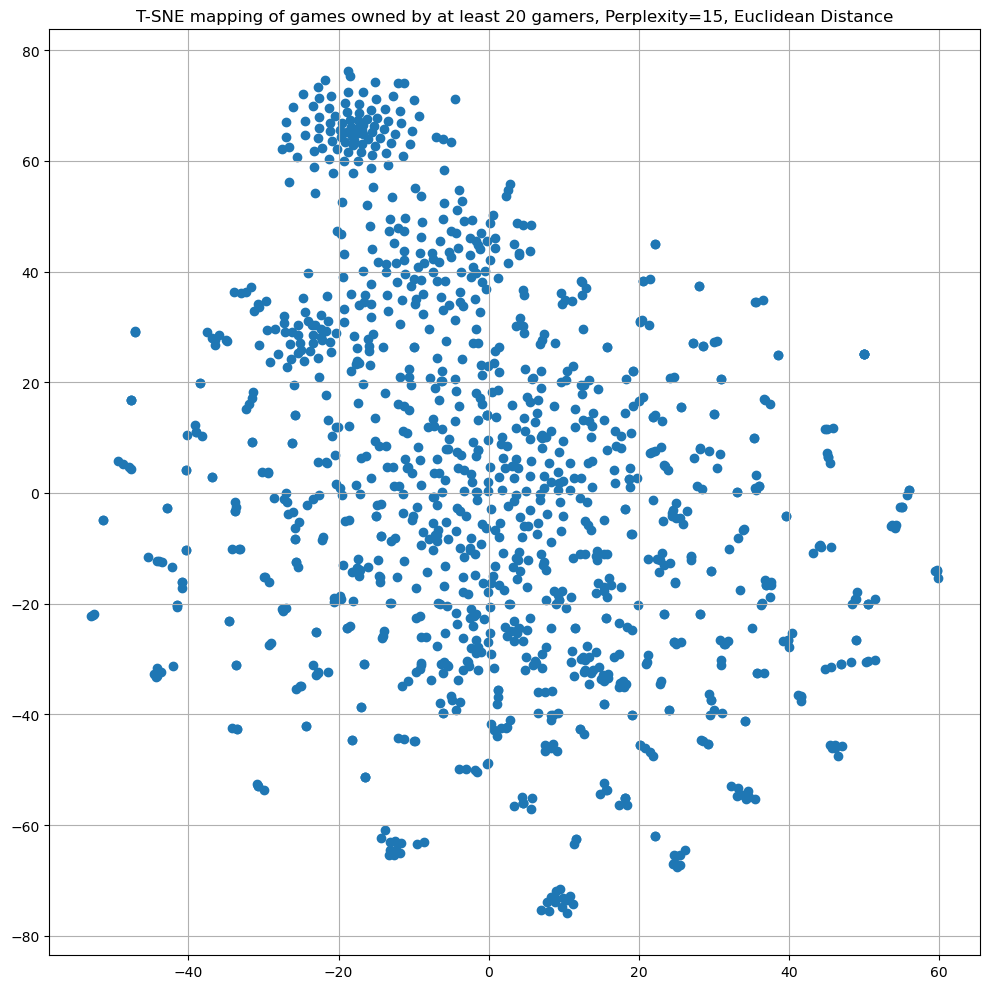

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=15).fit_transform(rating_matrix)

ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

ax.set_title("T-SNE mapping of games owned by at least 20 gamers, Perplexity=15, Euclidean Distance")
ax.grid()
fig.tight_layout()
plt.show()

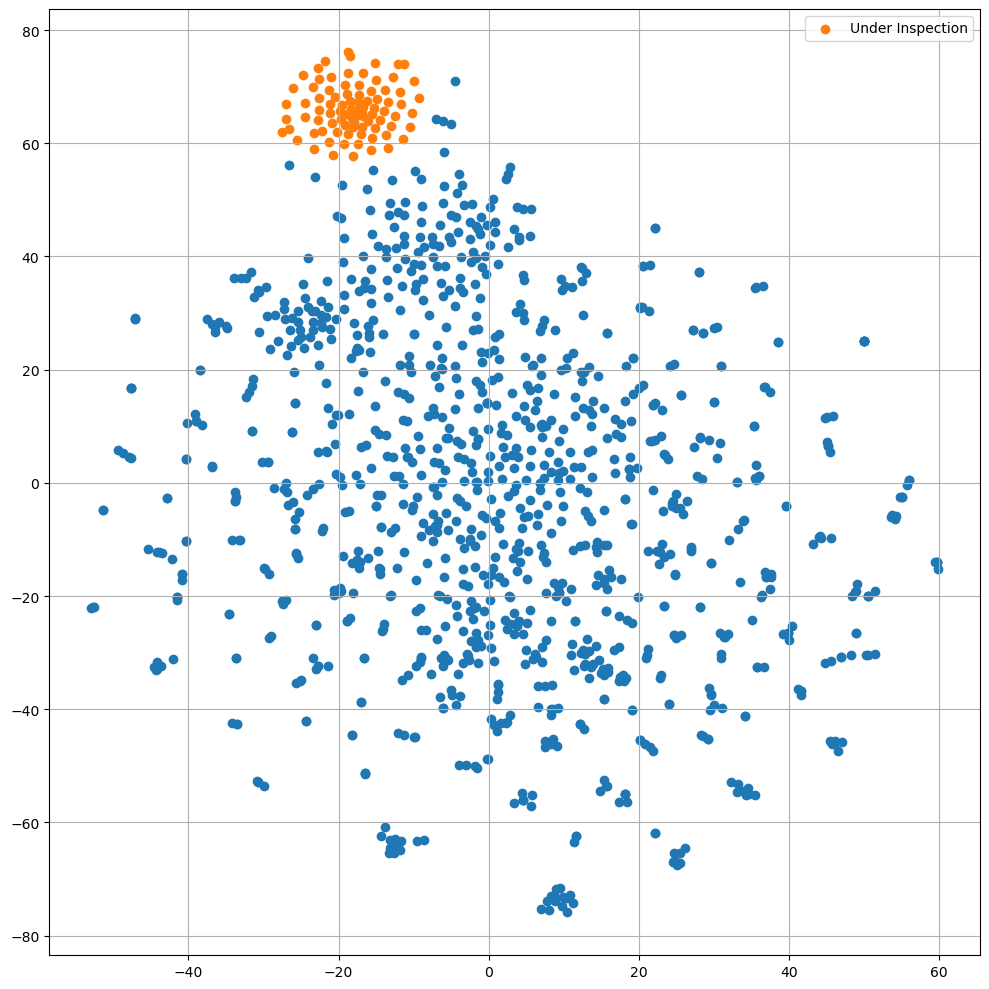

In [49]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -30, X_embedded[:, 0] < -8),
           np.logical_and(X_embedded[:, 1] > 57, X_embedded[:, 1] < 80)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()

ax.grid()
fig.tight_layout()
plt.show()

In [50]:
cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

A.V.A - Alliance of Valiant Arms
APB Reloaded
Age of Empires Online
Amazing World
America's Army 3
America's Army Proving Grounds
Archeblade
Arctic Combat
Aura Kingdom
Bloodline Champions
C9
Cakewalk Loop Manager
Champions Online
Combat Arms
Construct 2 Free
CrimeCraft GangWars
Dead Island Epidemic
Defiance
Dragon Nest
Dragon Nest Europe
Dragons and Titans
Dungeon Party
Dwarfs F2P
EVGA PrecisionX 16
EverQuest Free-to-Play
EverQuest II
Face of Mankind
Fallen Earth
Fiesta Online NA
Firefall
Floating Point
Football Superstars
Forsaken World 
Frontline Tactics
Global Agenda
Gotham City Impostors Free To Play
Grand Chase
Heroes & Generals
La Tale
Loadout
Mabinogi
March of War
Marvel Heroes 2015
MicroVolts Surge
NEOTOKYO
Neverwinter
Nosgoth
Only If
Panzar
Path of Exile
Pinball Arcade
PlanetSide 2
Pox Nora
Puzzle Pirates
Quantum Rush Online
ROSE Online
Ragnarok Online 2
Realm of the Mad God
Reversion - The Escape
Rise of Incarnates
Royal Quest
Rusty Hearts
Saira
Shadow Warrior Classic (1997)


What these games have in common is their game mode. Almost all of these games (all the games we have checked) have multiplayer mode.

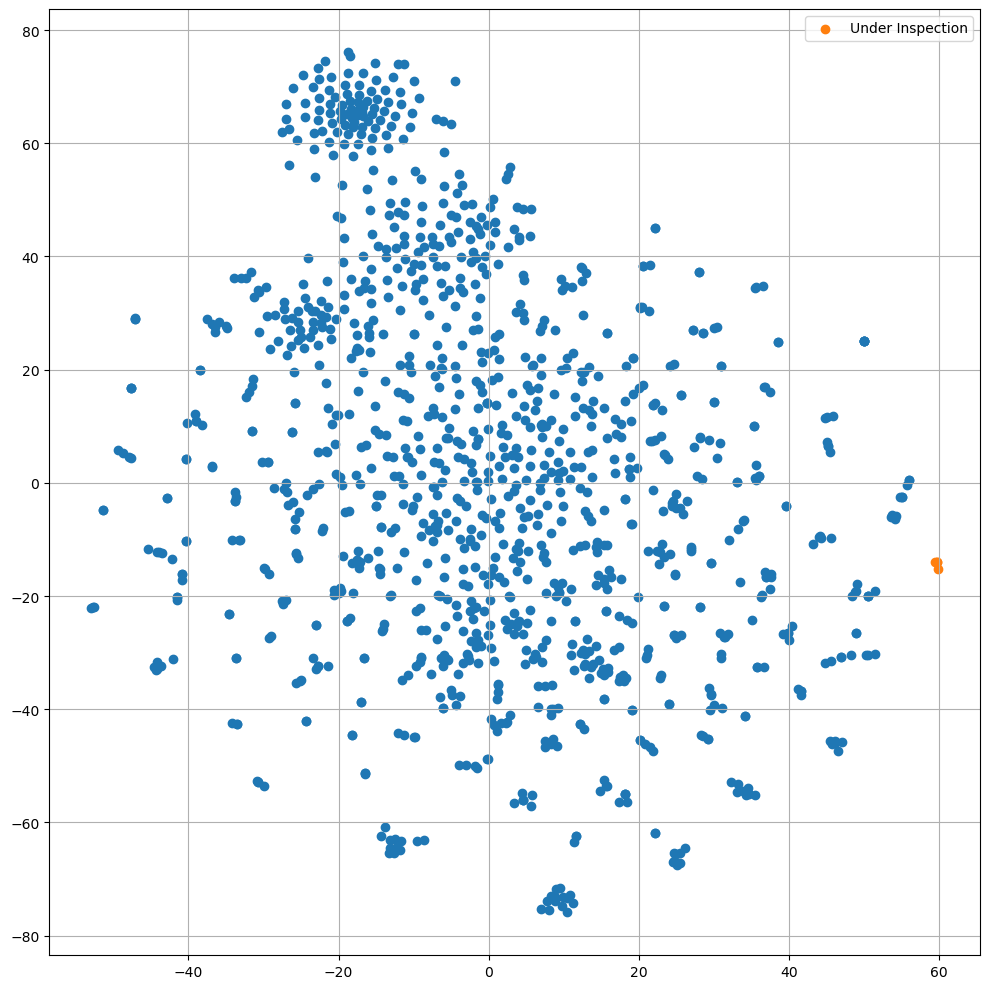

In [48]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 58, X_embedded[:, 0] < 65),
           np.logical_and(X_embedded[:, 1] > -20, X_embedded[:, 1] < -10)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

This is a pretty small cluster, consisting of Skyrim and its DLCs.

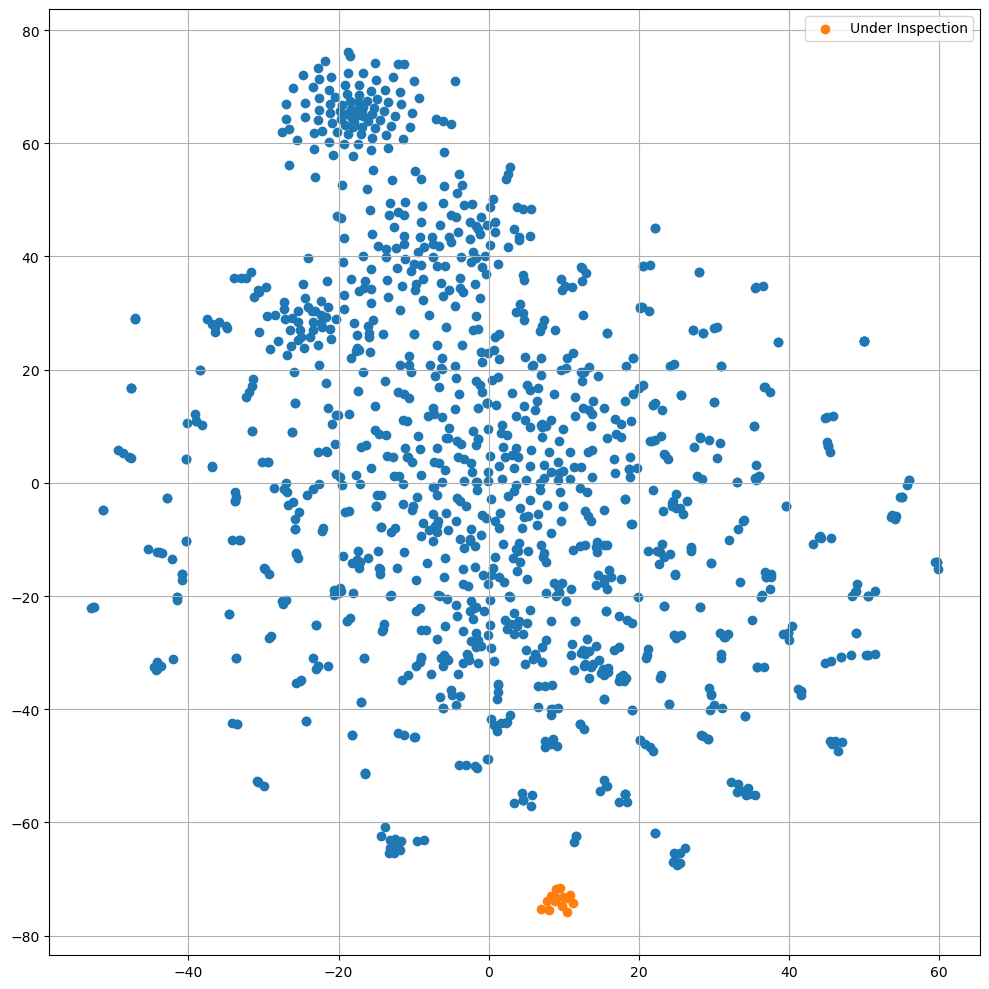

STAR WARS Knights of the Old Republic II The Sith Lords
Star Wars - Battlefront II
Star Wars - Jedi Knight II Jedi Outcast
Star Wars - Jedi Knight Mysteries of the Sith
Star Wars Dark Forces
Star Wars Empire at War Gold
Star Wars Jedi Knight Dark Forces II
Star Wars Jedi Knight Jedi Academy
Star Wars Knights of the Old Republic
Star Wars Republic Commando
Star Wars Starfighter
Star Wars The Clone Wars Republic Heroes
Star Wars The Force Unleashed II
Star Wars The Force Unleashed Ultimate Sith Edition


In [51]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 0, X_embedded[:, 0] < 20),
           np.logical_and(X_embedded[:, 1] > -80, X_embedded[:, 1] < -70)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

We have found the Star Wars universe cluster.

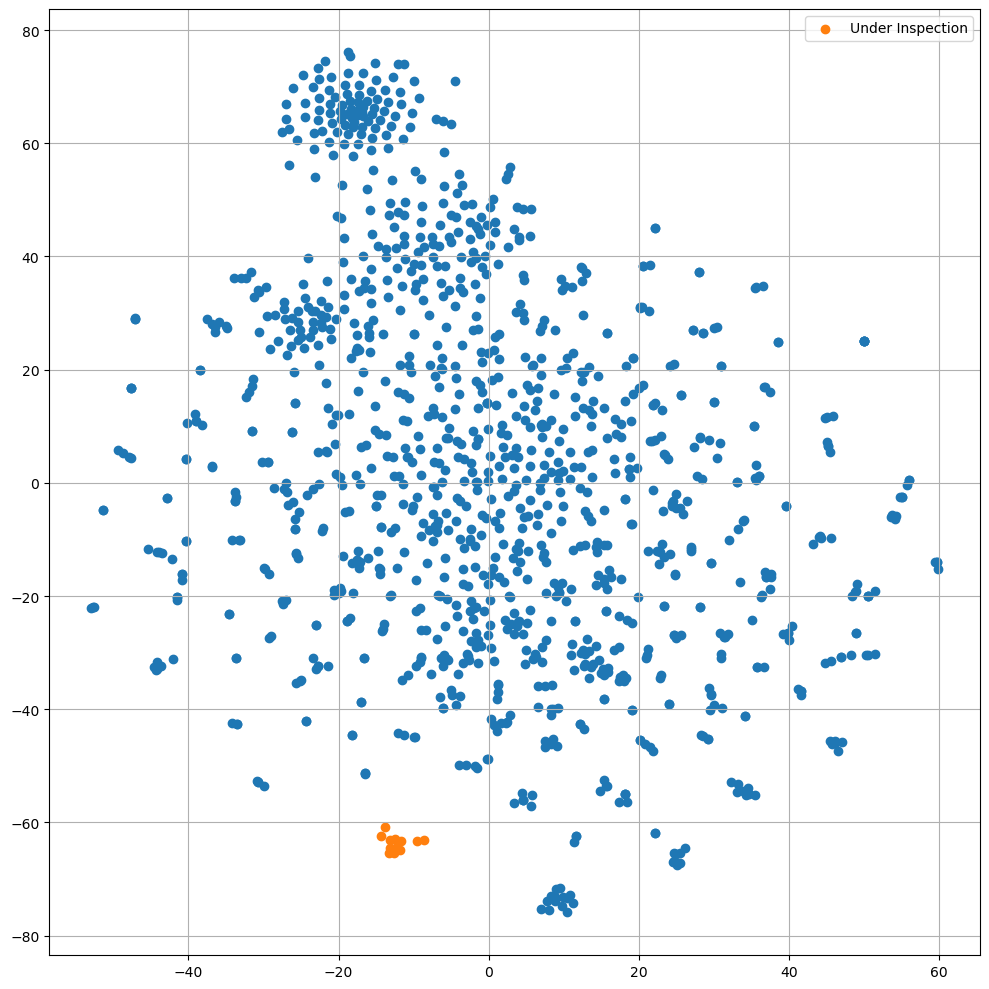

Lara Croft and the Guardian of Light
The Witcher 2 Assassins of Kings Enhanced Edition
The Witcher Enhanced Edition
Tomb Raider
Tomb Raider (VI) The Angel of Darkness
Tomb Raider Anniversary
Tomb Raider Chronicles
Tomb Raider I
Tomb Raider II
Tomb Raider III Adventures of Lara Croft
Tomb Raider Legend
Tomb Raider The Last Revelation
Tomb Raider Underworld


In [52]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -20, X_embedded[:, 0] < 0),
           np.logical_and(X_embedded[:, 1] > -70, X_embedded[:, 1] < -60)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

Here, we got the Tomb Raider Series. An interesting thing to note, is that according to our algorithm Witcher and Tomb Raider are pretty close in terms of users that own them.

When we check the two points to the right that is staying away a bit from the center of the cluster, we see those are the Witcher games.

When we check the two games to the left, away from the mean, we see that they are the "new series (reboot)" that were released in 2010 and 2013. These games change the origin story.

The center of the cluster consists of the classic Tomb Raider games.

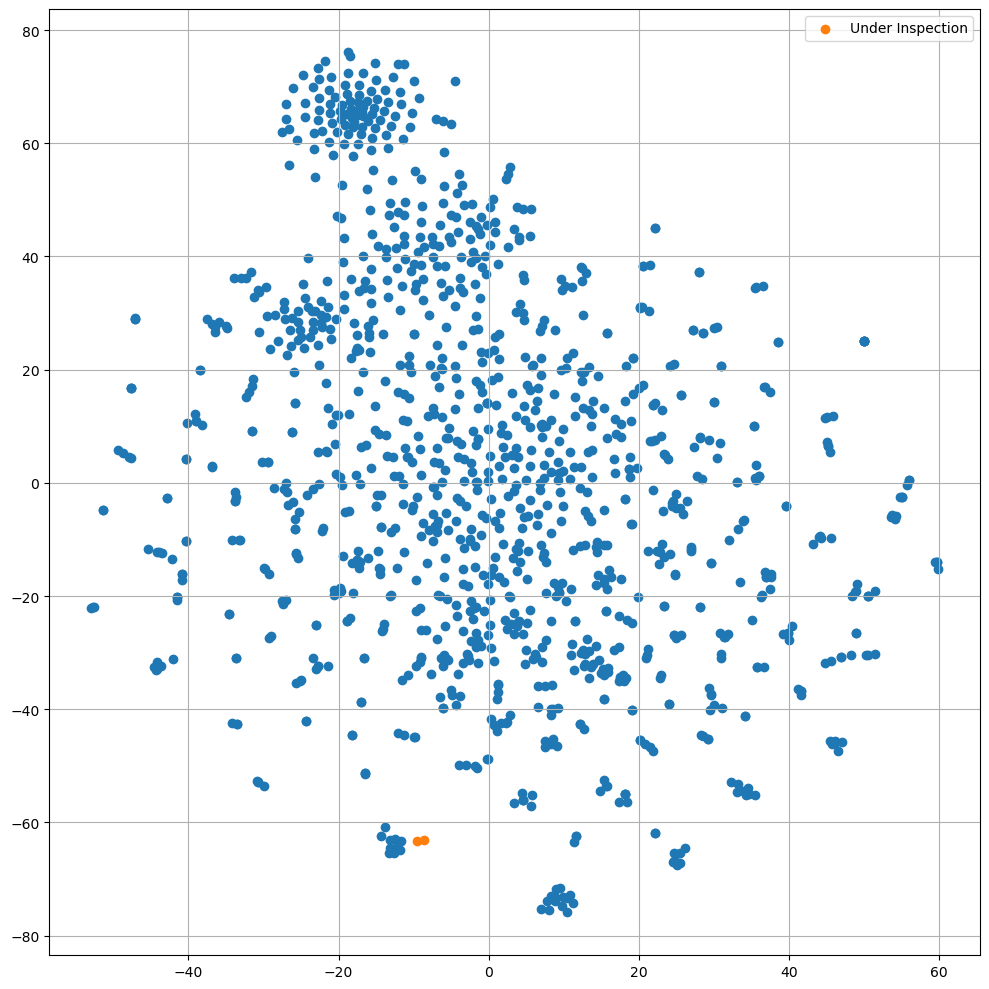

The Witcher 2 Assassins of Kings Enhanced Edition
The Witcher Enhanced Edition


In [54]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -10, X_embedded[:, 0] < 0),
           np.logical_and(X_embedded[:, 1] > -70, X_embedded[:, 1] < -60)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

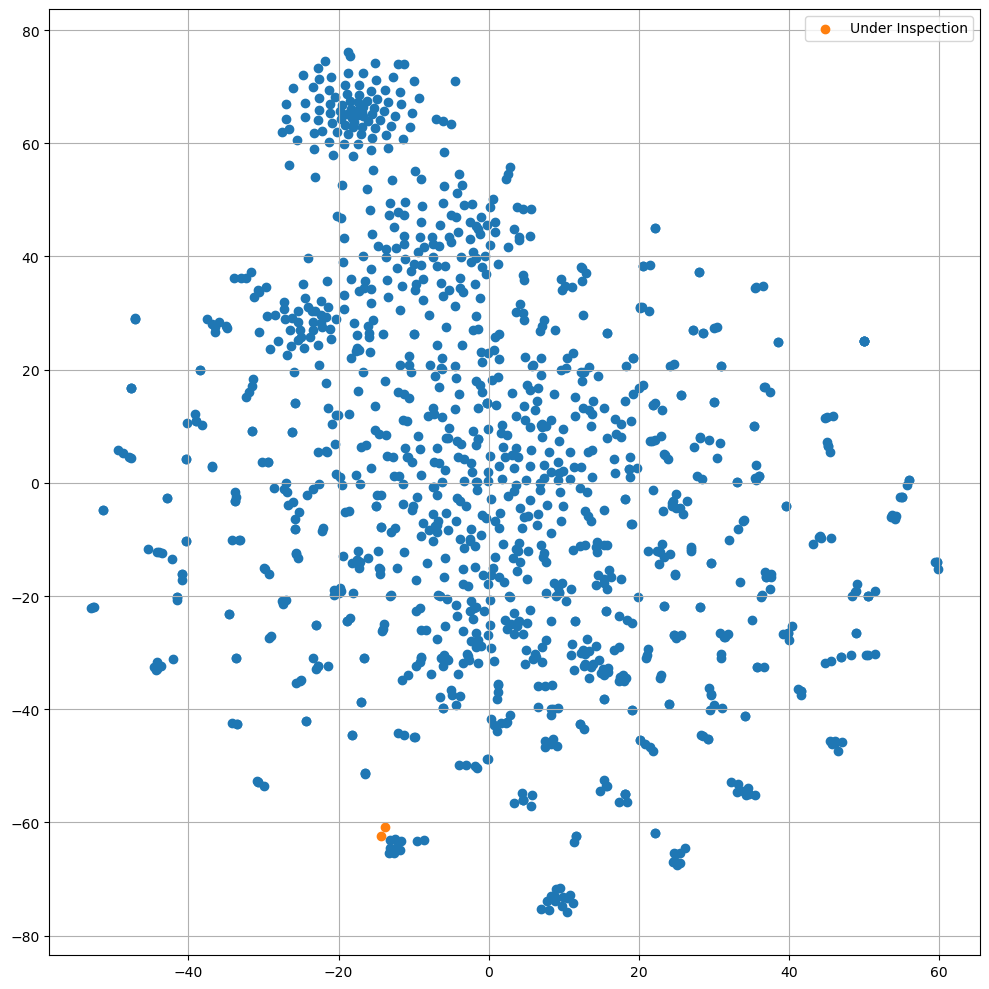

Lara Croft and the Guardian of Light
Tomb Raider


In [60]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -20, X_embedded[:, 0] < -13.5),
           np.logical_and(X_embedded[:, 1] > -70, X_embedded[:, 1] < -60)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

------------

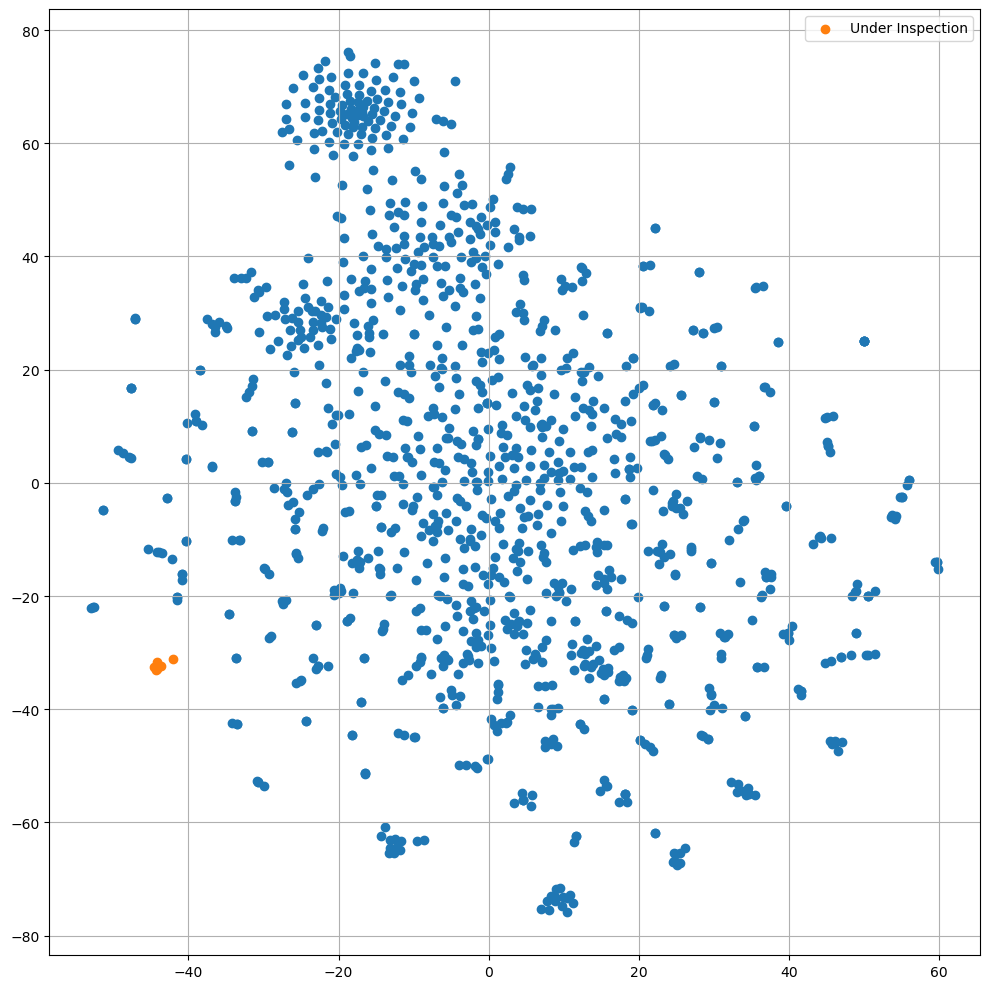

Borderlands 2 Headhunter 1 Bloody Harvest
Borderlands 2 Headhunter 2 Wattle Gobbler
Borderlands 2 Headhunter 3 Mercenary Day
Borderlands 2 Headhunter 4 Wedding Day Massacre
Borderlands 2 Headhunter 5 Son of Crawmerax
Borderlands The Pre-Sequel


In [62]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -50, X_embedded[:, 0] < -40),
           np.logical_and(X_embedded[:, 1] > -40, X_embedded[:, 1] < -25)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

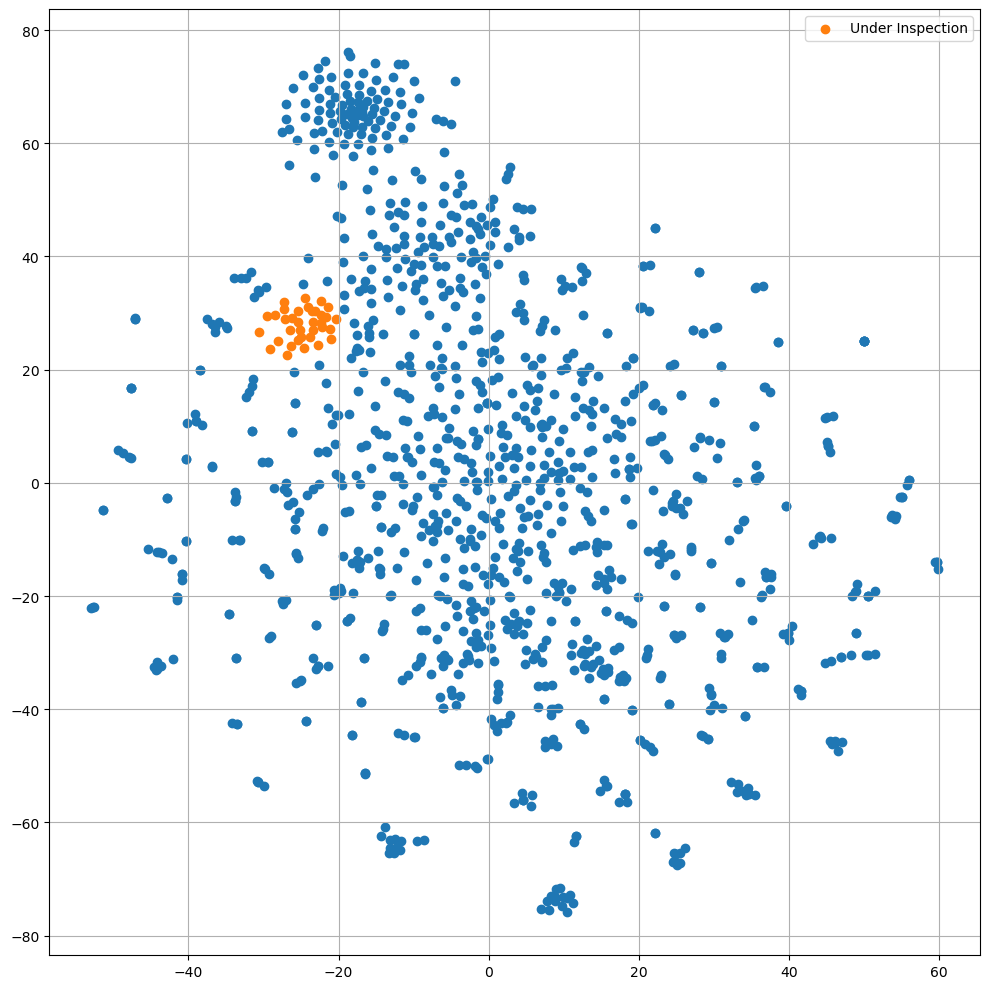

8BitBoy
Afterfall InSanity Extended Edition
Anomaly Warzone Earth
Brawlhalla
Canyon Capers
Chaos Domain
Commando Jack
Crash Time II
Dead Bits
Deadbreed
DogFighter
Earth 2150 The Moon Project
Enemy Mind
Grimoire Manastorm
Lucius
Magicka Wizard Wars
Murder Miners
Nosferatu The Wrath of Malachi
Overcast - Walden and the Werewolf
Particula
Pid 
RPG Maker VX Ace
Racer 8
Realms of the Haunting
Receiver
Skyborn
Space Hack
Stealth Inc 2
Super Killer Hornet Resurrection
Teleglitch Die More Edition
The Culling Of The Cows
Vertiginous Golf
Woodle Tree Adventures
X-Blades
iBomber Defense Pacific


In [71]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -33, X_embedded[:, 0] < -20),
           np.logical_and(X_embedded[:, 1] > 21, X_embedded[:, 1] < 32.7)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

Seemingly unrelated, this cluster have many games under 1 GB, with most of them being under 300 MBs and largest being under 4GBs. So, most likely explanation is, this is a list of casual games that a player can just download and try easily on their old and cheap computers, as the requirements also do not suggest high-end hardware. An interesting entry in this cluster is RPG Maker VX Ace, which is a game engine that makes it easy to create 2D RPG games that can also run on low-end PCs.

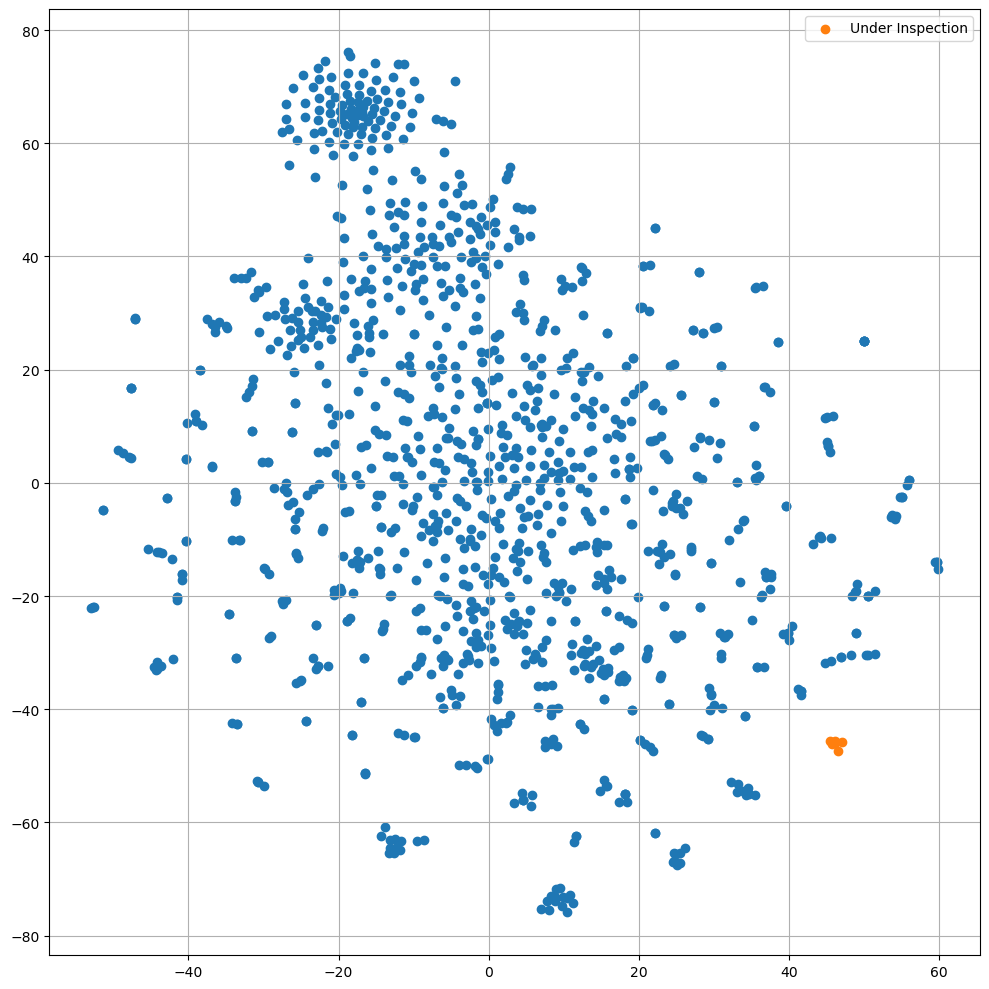

Borderlands
Borderlands 2
Borderlands DLC Claptraps New Robot Revolution
Borderlands DLC Mad Moxxi's Underdome Riot
Borderlands DLC The Secret Armory of General Knoxx
Borderlands DLC The Zombie Island of Dr. Ned


In [72]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 40, X_embedded[:, 0] < 60),
           np.logical_and(X_embedded[:, 1] > -60, X_embedded[:, 1] < -40)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

We have come across an interesting cluster. Previously, we had seen a Borderlands 2 DLC cluster. And now, in the other side of the plot, we get a Borderlands 1, Borderlands 2 and Borderlands 1 DLC cluster. This seems to prove that T-SNE doesn't preserve global structure that well, even when we use PCA initialization.

Overall, in the Purchase T-SNE graph, there are many small clusters and one big cluster. Big cluster consists of multiplayer games. Overall, this shows players that enjoy one multiplayer game, tend to try, or at least buy, other multiplayer games. (Duh!) Smaller clusters consists of game universes, and the games that belong to the same franchise get clustered together. This is expected, as we would expect if someone owns a game from one franchise, they are likely to buy the prequels and sequals.

In some clusters, we have observed some players refrained from buying games that change the origin story of the main character (Tomb Raider Series). Additionally, even though we have used PCA initialization we have seen that T-SNE doesn't preserve the global structure thanks to the Borderlands Series. Borderlands 2 DLCs are a separate cluster that is far left on the generated graph. Borderlands 1, Borderlands 2 and DLCs of Borderlands 1 are clustered on the right side of the graph.



### Jaccard

/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


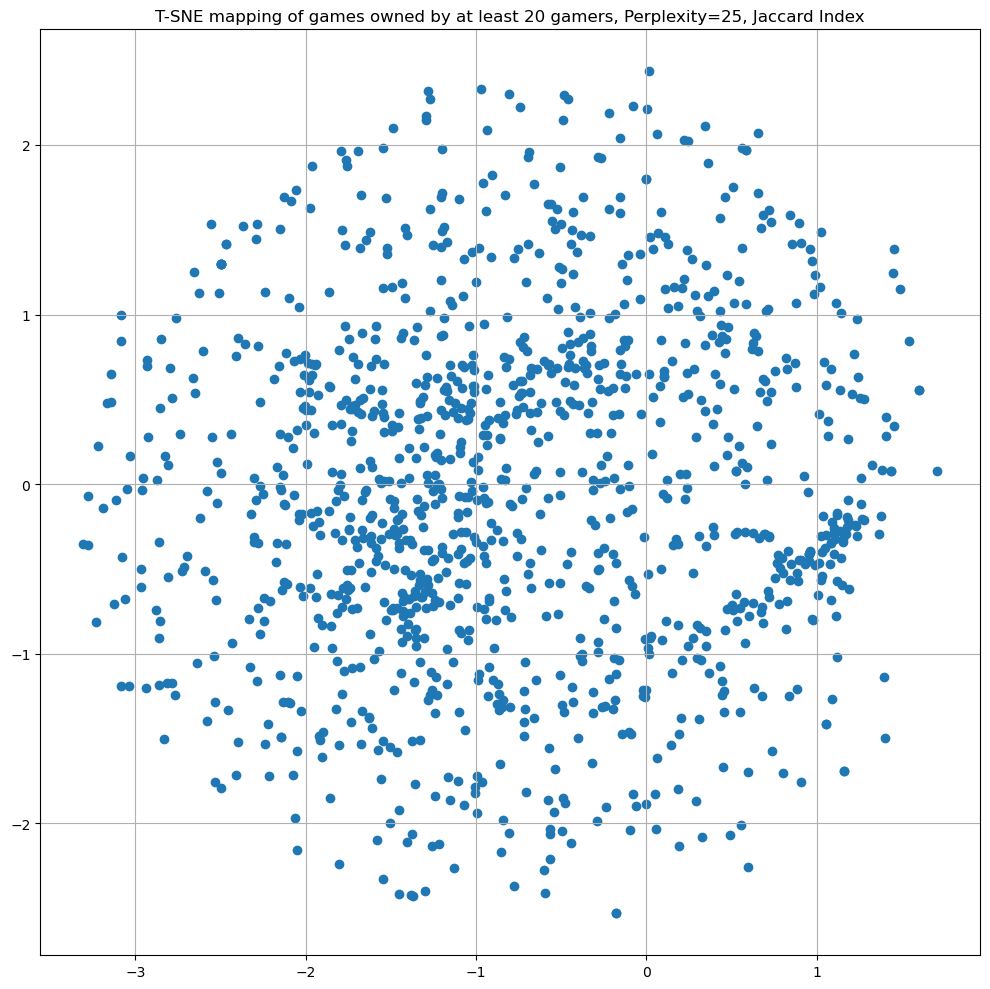

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=25, metric=jaccard).fit_transform(rating_matrix)

ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

ax.set_title("T-SNE mapping of games owned by at least 20 gamers, Perplexity=25, Jaccard Index")
ax.grid()
fig.tight_layout()
plt.show()

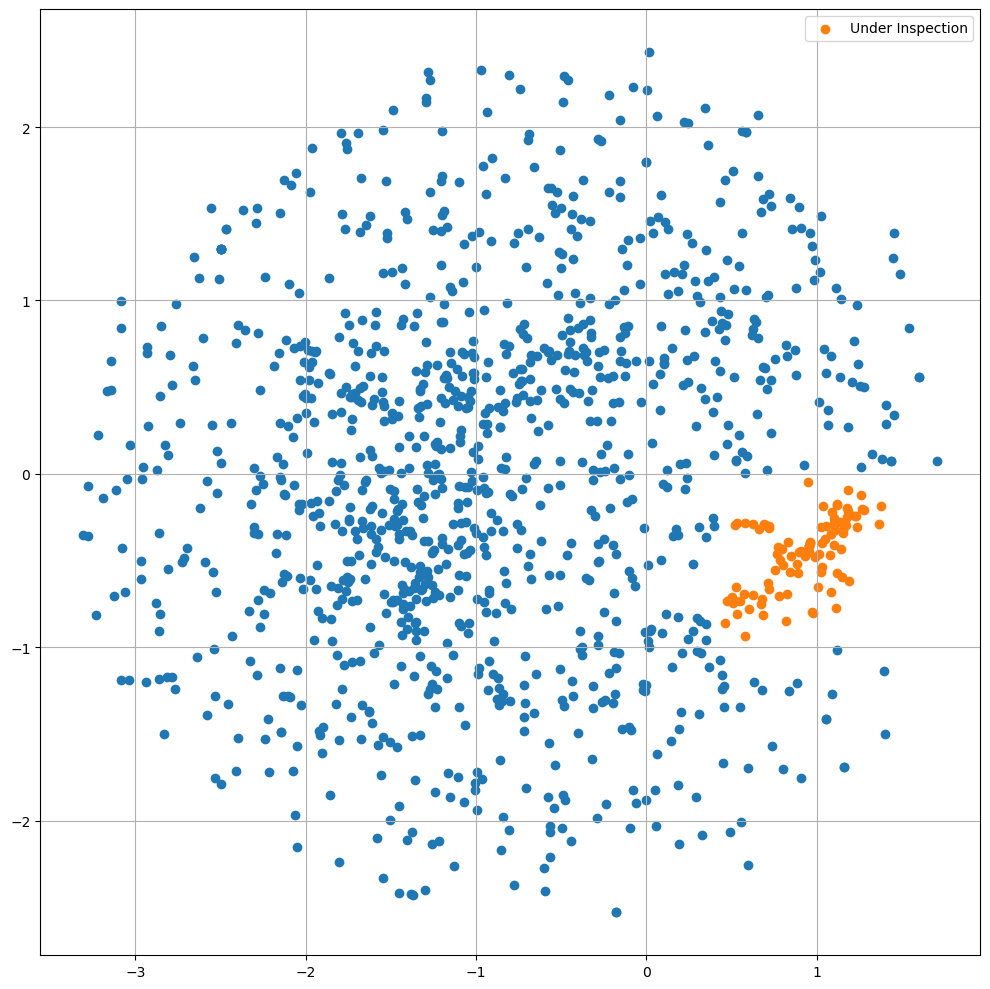

Alien Swarm
Amnesia The Dark Descent
Back to Dinosaur Island 
Bastion
BioShock
BioShock 2
BioShock Infinite
Borderlands
Borderlands 2
Burnout Paradise The Ultimate Box
Company of Heroes
Company of Heroes (New Steam Version)
Company of Heroes Opposing Fronts
Company of Heroes Tales of Valor
Counter-Strike Global Offensive
Counter-Strike Source
Crysis 2 Maximum Edition
Darksiders
Darksiders II
Dead Island
Dead Island Epidemic
Dead Space
Dead Space 2
Deus Ex Game of the Year Edition
Deus Ex Human Revolution
Deus Ex Human Revolution - Director's Cut
Deus Ex Invisible War
Dota 2
Dungeon Defenders
FEZ
Fallout 3 - Game of the Year Edition
Fallout New Vegas
Far Cry 2
Far Cry 2 Fortunes Pack
Far Cry 3
Garry's Mod
Grand Theft Auto III
Grand Theft Auto IV
Grand Theft Auto Vice City
Half-Life 2
Half-Life 2 Deathmatch
Half-Life 2 Lost Coast
Insurgency
Killing Floor
Killing Floor Mod Defence Alliance 2
LIMBO
Left 4 Dead 2
Legend of Grimrock
Magicka
Magicka Final Frontier
Magicka Nippon
Magicka Party

In [81]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 0.45, X_embedded[:, 0] < 1.5),
           np.logical_and(X_embedded[:, 1] > -1, X_embedded[:, 1] < 0)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

We can see that the mapping is at least somewhat successful, because the games that belong to the same franchise seems to be close on the graph. However, the games are not as well separated as it was when we used Euclidean distance. 

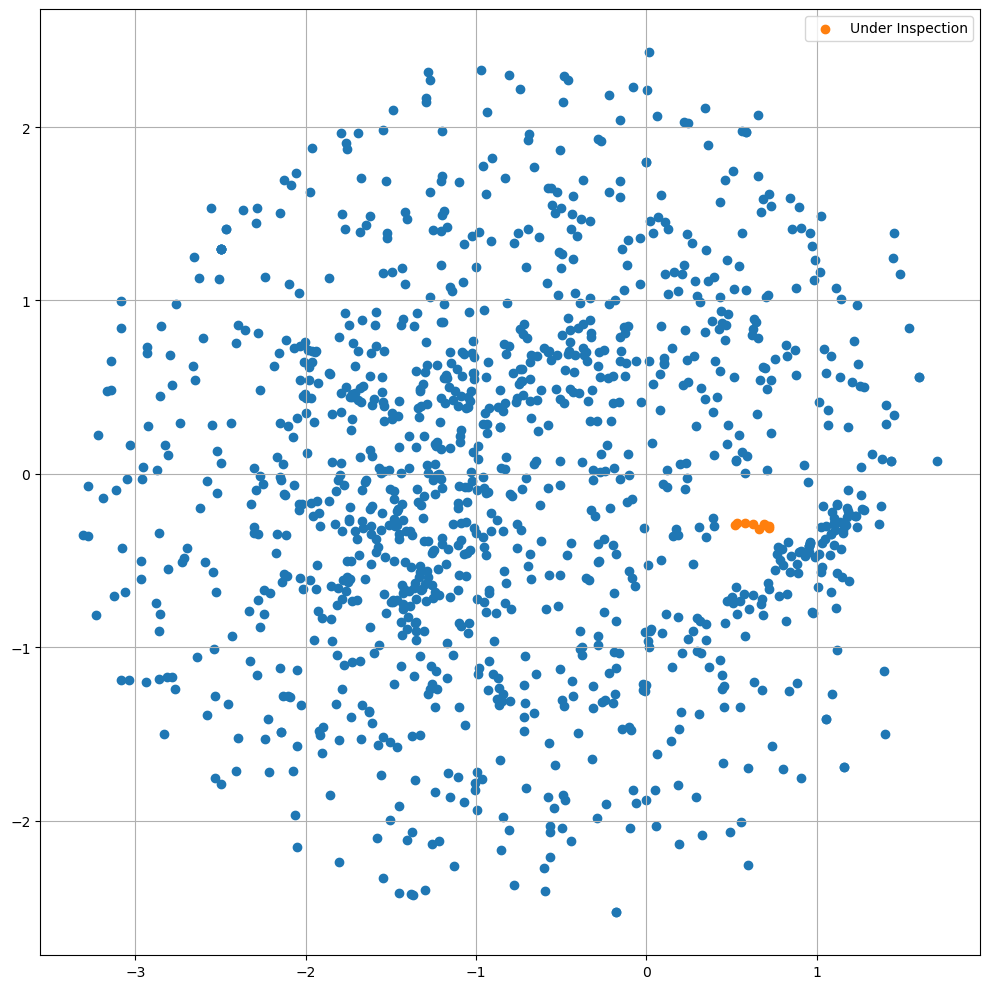

Back to Dinosaur Island 
Grand Theft Auto III
Grand Theft Auto Vice City
Insurgency
Sid Meier's Civilization IV
Sid Meier's Civilization IV Beyond the Sword
Sid Meier's Civilization IV Colonization
Sid Meier's Civilization IV Warlords
The Ship Single Player


In [87]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 0.45, X_embedded[:, 0] < 0.8),
           np.logical_and(X_embedded[:, 1] > -0.4, X_embedded[:, 1] < 0)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

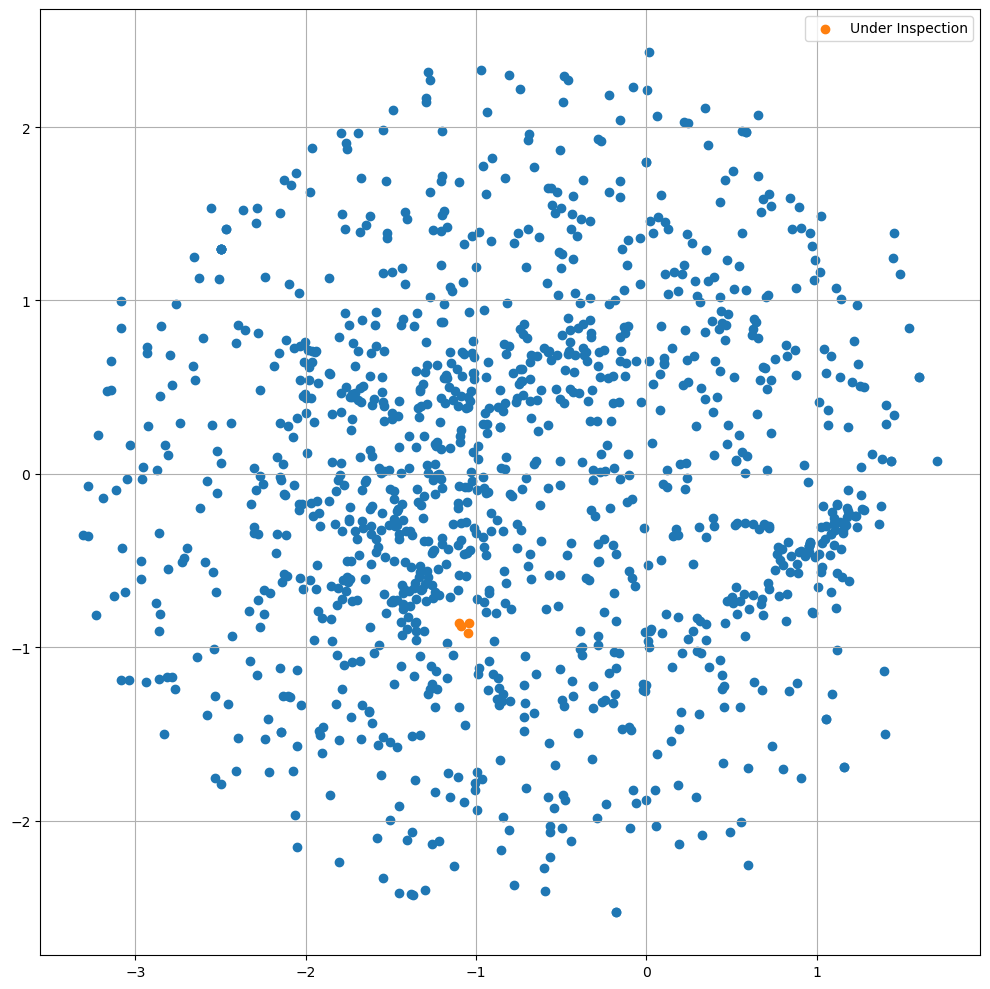

Emily is Away
KnightShift
Relic Hunters Zero
Spore Creepy & Cute Parts Pack


In [88]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > -1.15, X_embedded[:, 0] < -1),
           np.logical_and(X_embedded[:, 1] > -1, X_embedded[:, 1] < -0.8)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

This small cluster seems to be composed of old and unrelated games.

Let's check the region near some of the games we have checked during the previous notebooks.

In [95]:
game_encoder.categories_

[array(['7 Days to Die', '8BitBoy', '8BitMMO', ...,
        'resident evil 4 / biohazard 4', 'sZone-Online', 'theHunter'],
       dtype=object)]

In [102]:
cleaned_set[cleaned_set.game == "XCOM Enemy Unknown"]

,game,userId,row,column
1275,XCOM Enemy Unknown,303032390,11883,1185
1595,XCOM Enemy Unknown,57103808,1466,1185
2055,XCOM Enemy Unknown,9823354,171,1185
3294,XCOM Enemy Unknown,42061089,1015,1185
3764,XCOM Enemy Unknown,72842694,2028,1185
...,...,...,...,...
106581,XCOM Enemy Unknown,20772968,395,1185
107036,XCOM Enemy Unknown,47384303,1168,1185
107968,XCOM Enemy Unknown,117345810,3880,1185
108702,XCOM Enemy Unknown,42657809,1033,1185


In [103]:
X_embedded[1185, 0], X_embedded[1185, 1]

(1.2523718, 0.5085399)

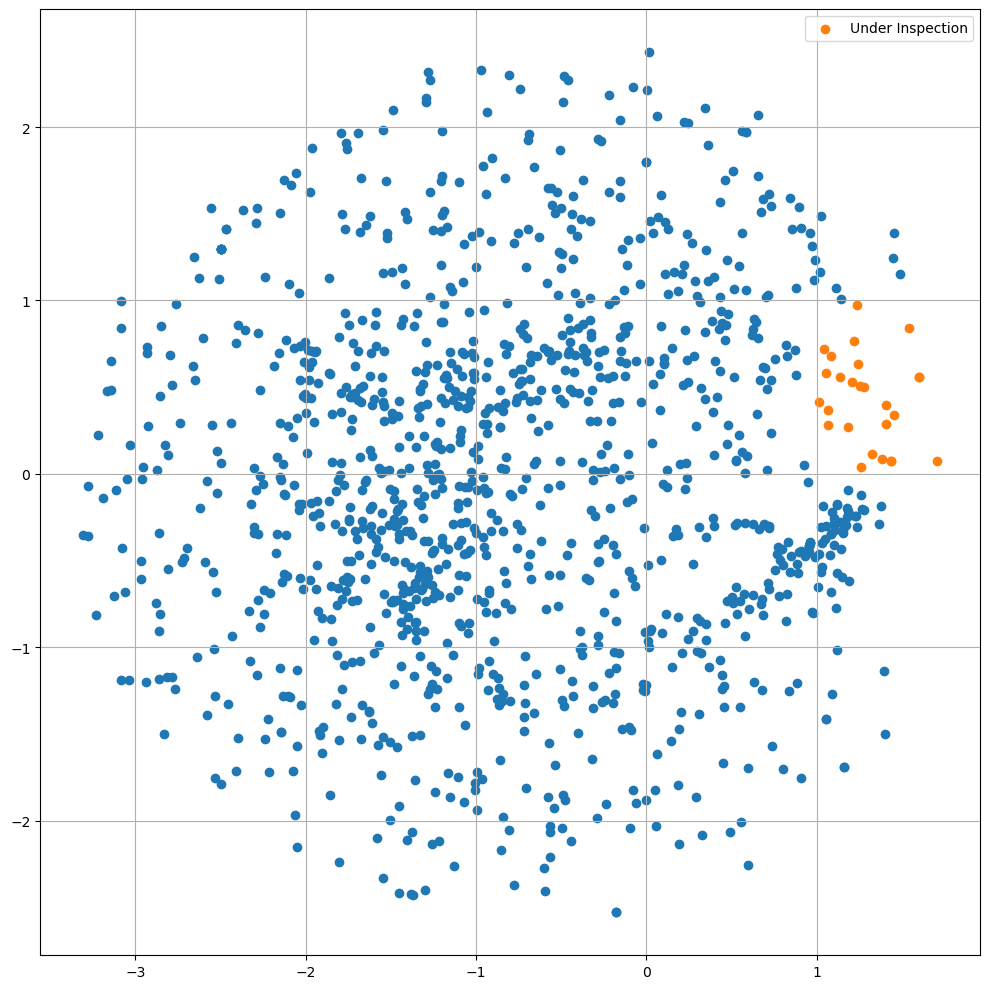

Age of Empires II HD Edition
Arma 2
Assassin's Creed Revelations
Awesomenauts
Chivalry Medieval Warfare
Contagion
Counter-Strike
Counter-Strike Condition Zero
Counter-Strike Condition Zero Deleted Scenes
Don't Starve
Don't Starve Together Beta
Dust An Elysian Tail
Just Cause 2
PAYDAY 2
PAYDAY The Heist
Patch testing for Chivalry
Sniper Elite V2
The Ship Tutorial
The Witcher 2 Assassins of Kings Enhanced Edition
Torchlight II
Trine
Tropico 3 - Steam Special Edition
Tropico 4
Warlock - Master of the Arcane
Warlock - Master of the Arcane Powerful Lords
XCOM Enemy Unknown


In [115]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 1, X_embedded[:, 0] < 2),
           np.logical_and(X_embedded[:, 1] > 0, X_embedded[:, 1] < 1)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

In [110]:
cleaned_set[cleaned_set.game == "XCOM Enemy Within"]

,game,userId,row,column
1676,XCOM Enemy Within,57103808,1466,1186
2200,XCOM Enemy Within,9823354,171,1186
4924,XCOM Enemy Within,34177747,790,1186
5390,XCOM Enemy Within,42005897,1010,1186
6888,XCOM Enemy Within,64787956,1753,1186
...,...,...,...,...
103586,XCOM Enemy Within,190650796,7498,1186
104762,XCOM Enemy Within,70844556,1957,1186
106955,XCOM Enemy Within,20772968,395,1186
107126,XCOM Enemy Within,47384303,1168,1186


In [111]:
X_embedded[1186, 0], X_embedded[1186, 1]

(0.0014370184, 2.2120433)

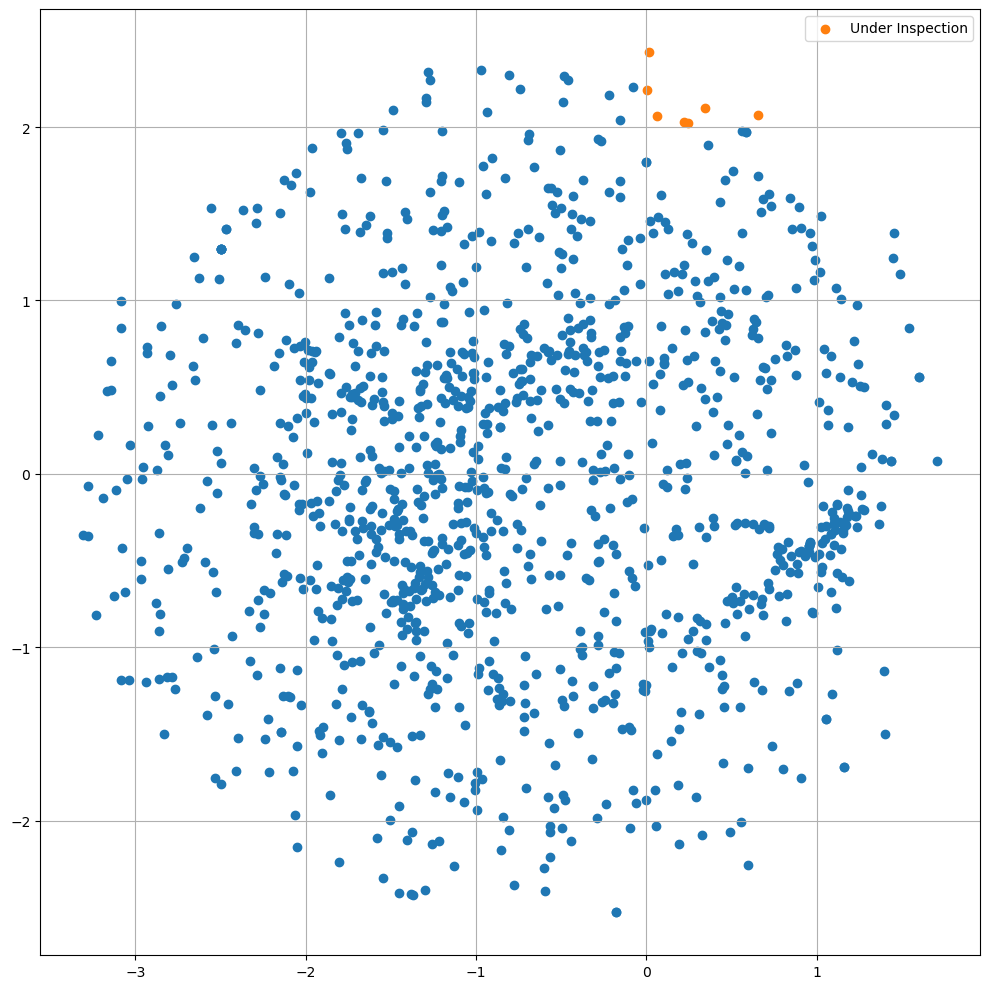

ARK Survival Evolved
Antichamber
Arma 2 DayZ Mod
Assassin's Creed IV Black Flag
Batman Arkham Origins
Warhammer 40,000 Space Marine
XCOM Enemy Within


In [116]:
indices = np.where(np.logical_and(np.logical_and(X_embedded[:, 0] > 0, X_embedded[:, 0] < 1),
           np.logical_and(X_embedded[:, 1] > 2, X_embedded[:, 1] < 3)))[0]

not_indices = [i for i in range(len(X_embedded)) if i not in indices]

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.scatter(X_embedded[not_indices, 0], X_embedded[not_indices, 1])
ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label="Under Inspection")
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

cluster_games = game_encoder.inverse_transform(indices.reshape(-1, 1))
for game in list(cluster_games[:, 0]):
    print(game)

Even though Jaccard index showed these two games as similar, when we use Jaccard in t-SNE as a metric, they are not grouped together. However, what is more curious is, insteading of pushing all the other games away, it is clustered with games that are further away then a game in the same franchise.